# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [2]:
import random

class Card:
    
    __suits=['Hearts','Clubs','Spades','Diamonds']
    __values=[2,3,4,5,6,7,8,9,10,'Jack','Queen','King','Ace']
    
    def __init__(self,suit,value):
        self.__suit=suit if suit in self.__suits else None
        self.__value=value if value in self.__values else None 
    def get_values(self):
        return self.__values
    def get_suits(self):
        return self.__suits
    def get_val(self):
      return self.__value
    def get_su(self):
        return self.__suit

    def get_numerical_value(self): #assign numerical values to cards
        if self.__value in ['Jack','Queen','King']:
            return 10
        elif self.__value == 'Ace':
            return 11
        else:
            return self.__value
        
    def __repr__(self):
        return f"{self.__value} of {self.__suit}"


class Deck: 
    __suits=['Hearts','Clubs','Spades','Diamonds']
    __values=[2,3,4,5,6,7,8,9,10,'Jack','Queen','King','Ace']
    
    def __init__(self,num_decks=6,quiet_mode=False):
        self.__num_decks=num_decks
        self.__cards=list()
        self.seen_cards=list()
        self.__make_deck()
        self.shuffle_card()
        self.__plastic_card_position= random.randint(0,len(self.__cards)-1) #make and add plastic/shuffle card
        self.quiet_mode=quiet_mode

    def __make_deck(self):
        self.__cards= [Card(suit,value) for _ in range(self.__num_decks) for value in self.__values for suit in self.__suits]
        
    def shuffle_card(self):
        random.shuffle(self.__cards)

    def show(self,message):
        if not self.quiet_mode: #print message if quiet mode is false
            print(message)

    def get_plastic_card_position(self):
        return self.__plastic_card_position

    def draw_card(self):
        if len(self.__cards) <= self.__plastic_card_position: #reshuffle if plastic card is already drawn
            self.show("Plastic Card reached. Cards reshuffled.")
            self.__cards=list()
            self.__make_deck()
            self.shuffle_card()
            self.__plastic_card_position= random.randint(0,len(self.__cards)-1)
            return self.draw_card() #draw again after shuffling anew
            
        card=self.__cards.pop() #pick a card
        self.seen_cards.append(card)
        return card 

In [10]:
my_deck=Deck()
my_deck.shuffle_card()

[my_deck.draw_card() for _ in range(10)]

[4 of Diamonds,
 King of Spades,
 Ace of Clubs,
 8 of Clubs,
 Queen of Clubs,
 6 of Clubs,
 2 of Spades,
 8 of Clubs,
 7 of Clubs,
 6 of Diamonds]

In [12]:
my_deck.get_plastic_card_position()

282

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [4]:
class Hand:
    def __init__(self):
        self.__cards=list()
        self.total=0
        self.aces=0
    def ace_adjust_value(self):
        pass
    def add_card(self,card):
        pass
    def get_cards(self):
        pass
    def __repr__(self):
        pass

class Strategy:
    def decide(self,player,deck):
        pass
class Manual_Strategy(Strategy):
    def decide(self,player,deck):
        pass
class  Dealer_Strategy(Strategy):
    def decide(self,player,deck):
        pass
class Card_Counting_Strategy(Strategy):
    def __init__(self, threshold=-2):
        self.total=0
        self.threshold=threshold
        self.counted_card=list()
    def sum_card_value(self,card):
        pass
    def decide(self,player,deck):
        pass
        
class Player:
    def __init__(self,name, strategy:Strategy, chips=100, quiet_mode=False):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.strategy=strategy 
        self.quiet_mode=quiet_mode
    def show(self,message):
        pass
    def hit(self,deck):
        pass
    def stand(self):
        pass
    def bet(self):
        pass
    def play(self,deck):
        pass
    def win_bet(self,bet_amount):
        pass
    def lose_bet(self, bet_amount):
        pass
    def bust(self):
        pass
        
class Dealer(Player):
    def __init__(self,quiet_mode=False):
        super().__init__(name="Dealer",chips=0, strategy=Dealer_Strategy(),quiet_mode=quiet_mode)
        
class Game:
    def __init__(self,max_round=None,quiet_mode=False):
        self.deck=Deck()
        self.players=list()
        self.all_players=list()
        self.dealer=Dealer(quiet_mode=quiet_mode)
        self.max_round=max_round
        self.round_count=0
        self.bet_amount=0
        self.player_bets=dict()
        self.quiet_mode=quiet_mode
    def show(self,message):
        pass
    def end_round_condition(self):
        pass
    def add_player(self,player):
        pass
    def determine_winner(self):
        pass
    def game_run(self):
        pass
    def show_finale(self):
        pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [50]:

class Player: #make moves and bets
    def __init__(self,name, strategy:Strategy, chips=100, quiet_mode=False):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.strategy=strategy 
        self.quiet_mode=quiet_mode

    def show(self,message):
        if not self.quiet_mode: #print message if quiet mode is false
            print(message)

    def hit(self,deck):
        card=deck.draw_card()
        self.hand.add_card(card)
        if isinstance(self.strategy, Card_Count_Strategy):
            self.strategy.sum_card_value(card) # to account for counted cards
        
    def stand(self):
        self.show(f"{self.name} stand.")

    def play(self,deck):
        while not self.bust():
            move=self.strategy.decide(self,deck)
            if move =='h':
                self.hit(deck)
                self.show(f"{self.name} hit. New Hand: {self.hand.__repr__()}")
                if self.bust():
                    self.show(f"{self.name} busted. Turn terminated.")
                    return
            else:
                self.stand()
                return

    def bet(self):
        if isinstance(self.strategy, Manual_Strategy): # bet for interactive player
            while True:
                try:
                    bet_amount=int(input(f"{self.name} have {self.chips} chips. How much do you want to bet? "))
                    
                    if bet_amount <= 0 or bet_amount > self.chips:
                        self.show("Invalid bet amount")
                        continue
                    self.current_bet_amount=bet_amount
                    self.chips-=bet_amount
                    break 
                except ValueError:
                    self.show("Invalid bet input.")
        else: #bet for computed player
            self.current_bet_amount=min(10,self.chips)
            self.chips-=self.current_bet_amount
            self.show(f"{self.name} automactically bet {self.current_bet_amount}. Chips remaining:{self.chips}")                    

    def win_bet(self,bet_amount):
        self.chips+= bet_amount*2
        self.show(f"{self.name} won {bet_amount*2} chips. Chips own: {self.chips}")

    def lose_bet(self,bet_amount):
        self.show(f"{self.name} lost {bet_amount} chips. Chips own: {self.chips}")

    def bust(self):
        return self.hand.total > 21
       
        
class Dealer(Player): #inherit functions from player for simplicity's sake
    def __init__(self,quiet_mode=False):
        super().__init__(name="Dealer",chips=0, strategy=Dealer_Strategy(),quiet_mode=quiet_mode)

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [66]:
class Card_Count_Strategy(Strategy): #as requested 
    def __init__(self, threshold=-2):
        self.total=0
        self.threshold=threshold
        self.counted_card=list()

    def sum_card_value(self,card):
        if card in self.counted_card:
            return
        self.counted_card.append(card) # keep note of counted card to make sure sum is correct
            
        value=card.get_numerical_value()
        if value in range (2,7):
            self.total +=1
        elif value in range (7,10):
            pass
        else:
            self.total -=1
        
    def decide(self,player,deck):
        for card in deck.seen_cards:
            self.sum_card_value(card)
        return "h" if self.total < self.threshold else 's'

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [6]:
#Complete Code logic for game(except card + deck), exmaple test is right below

class Hand: #hold card and calculate value of cards in hand
    def __init__(self):
        self.__cards=list()
        self.total=0
        self.aces=0

    def ace_value_adjust(self):
        while self.total > 21 and self.aces:
            self.total-=10 # make 1 ace value= 1 if total exceed 21
            self.aces-=1

    def add_card(self,card):
        self.__cards.append(card)
        points=card.get_numerical_value()
        self.total+=points
        
        if card.get_val()=='Ace':
            self.aces+=1
        self.ace_value_adjust()

    def get_cards(self):
        return self.__cards

    def __repr__(self):
        return ',  '.join(map(str, self.__cards)) + f" Total: {self.total}"


class Strategy: #to make and assign different strategy to player/dealer
    def decide(self,player,deck):
        raise NotImplementedError 
        
class Dealer_Strategy(Strategy):
    def decide(self,player,deck):
        return "h" if player.hand.total <17 else "s"
        
class Manual_Strategy(Strategy):
    def decide(self,player,deck):
        while True: 
            move=input(f"{player.name} hit or stand? (h/s)").strip().lower()
            if move in ['h','s']:
                return move
            print("Invalid move. Please choose 'h' or 's'")
            
class Card_Count_Strategy(Strategy): #as requested in question 6
    def __init__(self, threshold=-2):
        self.total=0
        self.threshold=threshold
        self.counted_card=list()

    def sum_card_value(self,card):
        if card in self.counted_card:
            return
        self.counted_card.append(card) # keep note of counted card to make sure sum is correct
            
        value=card.get_numerical_value()
        if value in range (2,7):
            self.total +=1
        elif value in range (7,10):
            pass
        else:
            self.total -=1
        
    def decide(self,player,deck):
        for card in deck.seen_cards:
            self.sum_card_value(card)
        return "h" if self.total < self.threshold else 's'
        

class Player: #make moves and bets
    def __init__(self,name, strategy:Strategy, chips=100, quiet_mode=False):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.strategy=strategy 
        self.quiet_mode=quiet_mode

    def show(self,message):
        if not self.quiet_mode: #print message if quiet mode is false
            print(message)

    def hit(self,deck):
        card=deck.draw_card()
        self.hand.add_card(card)
        if isinstance(self.strategy, Card_Count_Strategy):
            self.strategy.sum_card_value(card) # to account for counted cards
        
    def stand(self):
        self.show(f"{self.name} stand.")

    def play(self,deck):
        while not self.bust():
            move=self.strategy.decide(self,deck)
            if move =='h':
                self.hit(deck)
                self.show(f"{self.name} hit. New Hand: {self.hand.__repr__()}")
                if self.bust():
                    self.show(f"{self.name} busted. Turn terminated.")
                    return
            else:
                self.stand()
                return

    def bet(self):
        if isinstance(self.strategy, Manual_Strategy): # bet for interactive player
            while True:
                try:
                    bet_amount=int(input(f"{self.name} have {self.chips} chips. How much do you want to bet? "))
                    
                    if bet_amount <= 0 or bet_amount > self.chips:
                        self.show("Invalid bet amount")
                        continue
                    self.current_bet_amount=bet_amount
                    self.chips-=bet_amount
                    break 
                except ValueError:
                    self.show("Invalid bet input.")
        else: #bet for computed player
            self.current_bet_amount=min(10,self.chips)
            self.chips-=self.current_bet_amount
            self.show(f"{self.name} automactically bet {self.current_bet_amount}. Chips remaining:{self.chips}")                    

    def win_bet(self,bet_amount):
        self.chips+= bet_amount*2
        self.show(f"{self.name} won {bet_amount*2} chips. Chips own: {self.chips}")

    def lose_bet(self,bet_amount):
        self.show(f"{self.name} lost {bet_amount} chips. Chips own: {self.chips}")

    def bust(self):
        return self.hand.total > 21
       
        
class Dealer(Player): #inherit functions from player for simplicity's sake
    def __init__(self,quiet_mode=False):
        super().__init__(name="Dealer",chips=0, strategy=Dealer_Strategy(),quiet_mode=quiet_mode)


class Game:
    def __init__(self,max_round=None,quiet_mode=False):
        self.deck=Deck()
        self.players=list()
        self.all_players=list()
        self.dealer=Dealer(quiet_mode=quiet_mode)
        self.max_round=max_round
        self.round_count=0
        self.bet_amount=0
        self.player_bets=dict()
        self.quiet_mode=quiet_mode

    def show(self,message):
        if not self.quiet_mode: #print message if quiet mode is false
            print(message)

    def end_round_condition(self): #to stop game when necessary/conditions met
        if self.max_round and self.round_count >= self.max_round:
            self.show("Max rounds reached. Game finished.")
            return True
        elif all(player.chips <= 0 for player in self.players) or not self.players:
            self.show("All players ran out of chips. Game terminated.")
            return True
        return False

    def add_player(self,player):
        self.players.append(player)
        self.all_players.append(player) #remember all players

    def determine_winner(self):
        if self.dealer.bust():  #player win if they don't bust and dealer bust
            self.show("Dealer busted")
            for player in self.players:
                bet_amount=self.player_bets.get(player.name, 0)
                if not player.bust():
                    player.win_bet(bet_amount)
                else:
                    player.lose_bet(bet_amount)

        else:           
            for player in self.players: 
                bet_amount=self.player_bets.get(player.name, 0)
                if player.bust() and not self.dealer.bust():
                    player.lose_bet(bet_amount)
                elif player.hand.total > self.dealer.hand.total:
                    player.win_bet(bet_amount)
                elif player.hand.total < self.dealer.hand.total:
                    player.lose_bet(bet_amount)
                else:
                    player.chips += bet_amount 
                    self.show(f"{player.name} tie with dealer. Chips own: {player.chips}")
        

    def game_run(self):
        
        if self.end_round_condition(): #stop game if it reaches max round or all players run out of chips
            return 
            
        self.round_count+=1
        self.show(f"\n~~~ Round {self.round_count} ~~~")

        for player in self.all_players: #show if someone no longer play because they ran out of chips
            if player.chips  ==0:
                self.show(f"{player.name} ran out of chips and can no longer play.")
                
        #only allow players with chips to play; players with no chips cannot play
        self.players=[player for player in self.all_players if player.chips >0] 
            
        #Betting   
        self.player_bets=dict()
        for player in self.players:
            if player.chips>0:
                player.bet()
                self.player_bets[player.name]=player.current_bet_amount

        #Start with empty hand
        for player in self.players:
            player.hand=Hand()
        self.dealer.hand=Hand()

        #Deal card - this progressions makes sure all players get 1 card for 1 dealing and then repeat to retain randomness
        for player in self.players:
            player.hit(self.deck)
        self.dealer.hit(self.deck)
        for player in self.players:
            player.hit(self.deck)
        self.dealer.hit(self.deck)
        
        #Show dealer's initial card - in Black Jack dealer only shows one of the card at the beginning
        self.show(f"Dealer's Hand: {self.dealer.hand.get_cards()[0]} and [Hidden]")

        #allow players to play
        for player in self.players:
            if player.chips ==0 and player.current_bet_amount==0: #skip play if they're broke
                continue
            self.show(f"{player.name}'s Hand: {player.hand}") #in Black Jack, players' cards are shown as they are dealt
            player.play(self.deck)

        #allow dealer to make decision/play
        if not self.dealer.bust():
            self.show(f"Dealer's hand: {self.dealer.hand}")
            self.dealer.play(self.deck)

        self.determine_winner()

    
    def show_finale(self): #see final winning(s)
        self.show("Game done")
        self.show("Final chip counts:")
        for player in self.all_players:
            self.show(f"{player.name}: {player.chips}")

In [64]:
#Test game play
if __name__=="__main__":
    num_round=5
    game=Game(num_round)
    player1 = Player("Alice", Manual_Strategy(), chips=100)
    player2 = Player("Ben", Dealer_Strategy(), chips=100)
    player3 = Player("Oscar", Card_Count_Strategy(threshold=-2), chips=100)
    game.add_player(player1)
    game.add_player(player2)
    game.add_player(player3)
    for i in range(num_round):
        game.game_run()
    game.show_finale()


~~~ Round 1 ~~~


Alice have 100 chips. How much do you want to bet?  500


Invalid bet amount


Alice have 100 chips. How much do you want to bet?  50


Ben automactically bet 10. Chips remaining:90
Oscar automactically bet 10. Chips remaining:90
Dealer's Hand: Ace of Clubs and [Hidden]
Alice's Hand: 7 of Spades,  3 of Diamonds Total: 10


Alice hit or stand? (h/s) 


Invalid move. Please choose 'h' or 's'


Alice hit or stand? (h/s) g


Invalid move. Please choose 'h' or 's'


Alice hit or stand? (h/s) h


Alice hit. New Hand: 7 of Spades,  3 of Diamonds,  Ace of Hearts Total: 21


Alice hit or stand? (h/s) s


Alice stand.
Ben's Hand: 7 of Spades,  9 of Hearts Total: 16
Ben hit. New Hand: 7 of Spades,  9 of Hearts,  2 of Clubs Total: 18
Ben stand.
Oscar's Hand: 5 of Hearts,  4 of Diamonds Total: 9
Oscar stand.
Dealer's hand: Ace of Clubs,  9 of Diamonds Total: 20
Dealer stand.
Alice won 100 chips. Chips own: 150
Ben lost 10 chips. Chips own: 90
Oscar lost 10 chips. Chips own: 90

~~~ Round 2 ~~~


Alice have 150 chips. How much do you want to bet?  150


Ben automactically bet 10. Chips remaining:80
Oscar automactically bet 10. Chips remaining:80
Dealer's Hand: Ace of Spades and [Hidden]
Alice's Hand: Ace of Diamonds,  8 of Clubs Total: 19


Alice hit or stand? (h/s) h


Alice hit. New Hand: Ace of Diamonds,  8 of Clubs,  2 of Diamonds Total: 21


Alice hit or stand? (h/s) h


Alice hit. New Hand: Ace of Diamonds,  8 of Clubs,  2 of Diamonds,  9 of Hearts Total: 20


Alice hit or stand? (h/s) h


Alice hit. New Hand: Ace of Diamonds,  8 of Clubs,  2 of Diamonds,  9 of Hearts,  Jack of Spades Total: 30
Alice busted. Turn terminated.
Ben's Hand: 2 of Clubs,  Ace of Spades Total: 13
Ben hit. New Hand: 2 of Clubs,  Ace of Spades,  5 of Hearts Total: 18
Ben stand.
Oscar's Hand: 3 of Spades,  King of Diamonds Total: 13
Oscar stand.
Dealer's hand: Ace of Spades,  Jack of Spades Total: 21
Dealer stand.
Alice lost 150 chips. Chips own: 0
Ben lost 10 chips. Chips own: 80
Oscar lost 10 chips. Chips own: 80

~~~ Round 3 ~~~
Alice ran out of chips and can no longer play.
Ben automactically bet 10. Chips remaining:70
Oscar automactically bet 10. Chips remaining:70
Dealer's Hand: 9 of Clubs and [Hidden]
Ben's Hand: 6 of Clubs,  5 of Spades Total: 11
Ben hit. New Hand: 6 of Clubs,  5 of Spades,  Jack of Spades Total: 21
Ben stand.
Oscar's Hand: King of Spades,  2 of Clubs Total: 12
Oscar stand.
Dealer's hand: 9 of Clubs,  2 of Hearts Total: 11
Dealer hit. New Hand: 9 of Clubs,  2 of Hearts,  J

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def tester(n_round=50,n_game=1):
    net_win=list()
    for i in range(n_game): #play x amount of game
        game=Game(n_round,quiet_mode=True) 
        player1 = Player("Sim1", Dealer_Strategy(), chips=100,quiet_mode=True)
        player2 = Player("Sim2", Dealer_Strategy(), chips=100,quiet_mode=True)
        player3 = Player("Sim3", Dealer_Strategy(), chips=100,quiet_mode=True)
        player4 = Player("Strategy", Card_Count_Strategy(threshold=-2), chips=100,quiet_mode=True)
        game.add_player(player1)
        game.add_player(player2)
        game.add_player(player3)
        game.add_player(player4)

        start_chips= {player.name: player.chips for player in game.all_players} #to calc net chips

        deck=Deck(quiet_mode=True)
        game.deck=deck
        
        round_played=0 #track rounds played in 1 game
        for j in range(n_round): # run x amount of rounds per game
            if player4.chips <=0: #stop game if strategy player runs out of money
                break 
                
            game.game_run()
            round_played+=1
        
        net_game_win={
            'Net Win': {player.name: player.chips - start_chips[player.name] for player in game.all_players},
            'Rounds Played': round_played}
        net_win.append(net_game_win)
        
    return net_win

In [28]:
test_game=tester()
test_game

[{'Net Win': {'Sim1': -20, 'Sim2': 0, 'Sim3': 80, 'Strategy': -100},
  'Rounds Played': 40}]

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


Average Net Winnings (Chips) per Round: -0.03992490613266583 
Standard Dev: 19.144450893143944 
Win Probability: 0.01 
Lose Probability: 0.99


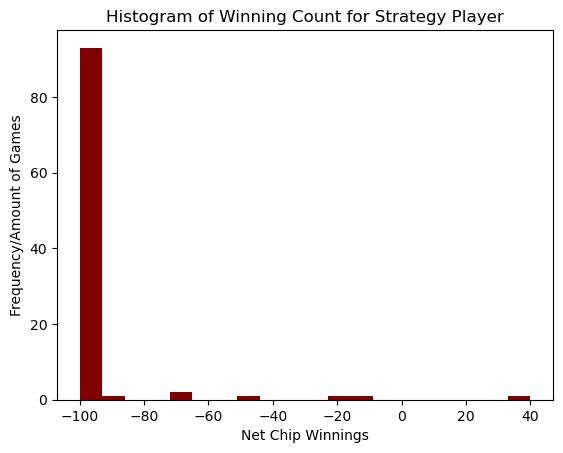

In [30]:
number_100_game=tester(n_game=100) #100 games of automatic 50 rounds/until strategy player runs out of chips

#for the stats 
strategy_win= [d['Net Win']['Strategy'] for d in number_100_game] #slice for strategy player's winnings only

rounds_played= [r['Rounds Played'] for r in number_100_game]
total_rounds_played=sum(rounds_played)

strategy_average_winning=np.mean(strategy_win)/ total_rounds_played #account for rounds actually played/game
strategy_standard_dev=np.std(strategy_win)
net_win_prob=sum(1 for chips in strategy_win if chips > 0)/len(strategy_win) #account for games played
net_lose_prob=1-net_win_prob

print("Average Net Winnings (Chips) per Round:", strategy_average_winning, 
      "\nStandard Dev:", strategy_standard_dev, "\nWin Probability:", net_win_prob ,
      "\nLose Probability:", net_lose_prob)

#histogram for strategy player only
plt.hist(strategy_win,bins=20,color='maroon')
plt.title("Histogram of Winning Count for Strategy Player")
plt.xlabel("Net Chip Winnings")
plt.ylabel("Frequency/Amount of Games")
plt.show()

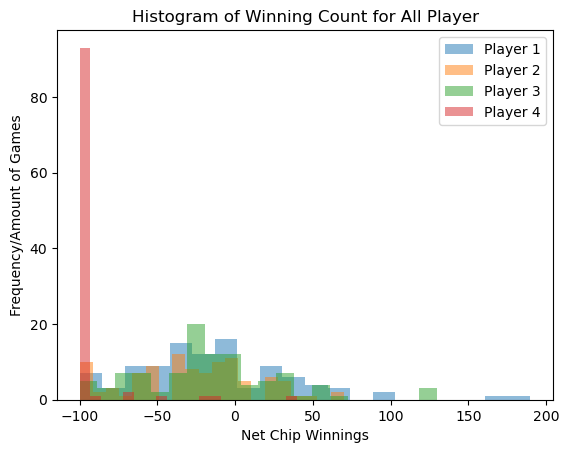

In [32]:
#here's a histogram for all players
total_players=4
all_winnings=np.zeros((len(number_100_game),total_players)) #make empty array

#store game, player (their chip winning) in the array
for i, result in enumerate(number_100_game): 
    for j,player_name in enumerate(['Sim1','Sim2','Sim3','Strategy']):
        all_winnings[i,j]= result['Net Win'][player_name]
        
#plot        
for i in range(all_winnings.shape[1]):
    plt.hist(all_winnings[:,i], label=f'Player {i+1}', alpha=0.5, bins=20)
plt.title("Histogram of Winning Count for All Player")
plt.xlabel("Net Chip Winnings")
plt.ylabel("Frequency/Amount of Games")
plt.legend()
plt.show()

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [92]:
def threshold_tester(n_round=50,n_game=100):
    results=list()
    threshold=range(-5,5)
    for t in threshold:
        net_win=list()
        for i in range(n_game): #play x amount of game
            game=Game(n_round,quiet_mode=True)
            player1 = Player("Sim1", Dealer_Strategy(), chips=100,quiet_mode=True)
            player2 = Player("Sim2", Dealer_Strategy(), chips=100,quiet_mode=True)
            player3 = Player("Sim3", Dealer_Strategy(), chips=100,quiet_mode=True)
            player4 = Player("Strategy", Card_Count_Strategy(threshold=t), chips=100,quiet_mode=True)
            game.add_player(player1)
            game.add_player(player2)
            game.add_player(player3)
            game.add_player(player4)
    
            start_chips= {player.name: player.chips for player in game.all_players}
            deck=Deck(quiet_mode=True)
            game.deck=deck
    
            round_played=0 #track rounds played in 1 game
            for j in range(n_round): # run x amount of rounds per game
                if player4.chips <=0: #stop game if strategy player runs out of money
                    break 
                    
                game.game_run()
                round_played+=1
            
            net_game_win={
                'Net Win': {player.name: player.chips - start_chips[player.name] for player in game.all_players},
                'Rounds Played': round_played}
            net_win.append(net_game_win)
        results.append({"Threshold":t, "Net Win": net_win})
        
    return results

In [104]:
res=threshold_tester(n_round=100,n_game=100)
thresholds=range(-5,5)
for threshold in thresholds:
    strat_win_threshold = [net_game_win['Net Win']['Strategy'] for result in res if result['Threshold'] == threshold for net_game_win in result['Net Win']]
    
    if strat_win_threshold:  # Ensure results exist
        rounds_played= [net_game_win['Rounds Played'] for result in res if result['Threshold'] == threshold for net_game_win in result['Net Win']]
        total_rounds_played=sum(rounds_played)    
        avg_win = np.mean(strat_win_threshold) / total_rounds_played
        std_dev = np.std(strat_win_threshold)
        win_prob = sum(1 for chips in strat_win_threshold if chips > 0) / len(strat_win_threshold)
        lose_prob = 1 - win_prob
        
        print(f"Threshold: {threshold}")
        print(f"Average Winnings per Round: {avg_win}")
        print(f"Standard Deviation: {std_dev}")
        print(f"Net Win Probability: {win_prob}")
        print(f"Net Lose Probability: {lose_prob}")

Threshold: -5
Average Winnings per Round: -0.029657320872274143
Standard Deviation: 30.642454209805056
Net Win Probability: 0.02
Net Lose Probability: 0.98
Threshold: -4
Average Winnings per Round: -0.03276855303287021
Standard Deviation: 17.438749955200343
Net Win Probability: 0.01
Net Lose Probability: 0.99
Threshold: -3
Average Winnings per Round: -0.03603504928806134
Standard Deviation: 12.934836682386052
Net Win Probability: 0.01
Net Lose Probability: 0.99
Threshold: -2
Average Winnings per Round: -0.03714177978883861
Standard Deviation: 12.278029157808675
Net Win Probability: 0.01
Net Lose Probability: 0.99
Threshold: -1
Average Winnings per Round: -0.044808988764044946
Standard Deviation: 2.9849623113198605
Net Win Probability: 0.0
Net Lose Probability: 1.0
Threshold: 0
Average Winnings per Round: -0.04636871508379888
Standard Deviation: 3.9799497484264807
Net Win Probability: 0.0
Net Lose Probability: 1.0
Threshold: 1
Average Winnings per Round: -0.04621106462110647
Standard De

Optimal threshold value seem to be -5

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [34]:
class Hopeful_Strategy(Strategy):

    def decide(self,player,deck):
        #soft for when hand has Ace that can be either 1/11 opposed to hard-value fixed at 17
        soft_hand=player.hand.total < 17 and player.hand.aces > 0 

        if player.hand.total <= 11:
            return 'h'
        elif player.hand.total < 17 and soft_hand:
            return 'h'
        elif 12 <= player.hand.total <=16:
            return 'h'
        else:
            return 's'

In [36]:
#same to tester func in q8, difference is in player

def new_tester(n_round=50,n_game=1):
    net_win=list()
    for i in range(n_game): #play x amount of game
        game=Game(n_round,quiet_mode=True) 
        player1 = Player("Sim1", Dealer_Strategy(), chips=100,quiet_mode=True)
        player2 = Player("Sim2", Dealer_Strategy(), chips=100,quiet_mode=True)
        player3 = Player("Hope", Hopeful_Strategy(), chips=100,quiet_mode=True) #added new strategy player - Hope
        player4 = Player("Strategy", Card_Count_Strategy(threshold=-2), chips=100,quiet_mode=True)
        game.add_player(player1)
        game.add_player(player2)
        game.add_player(player3)
        game.add_player(player4)

        start_chips= {player.name: player.chips for player in game.all_players} #to calc net chips

        deck=Deck(quiet_mode=True)
        game.deck=deck

        round_played=0 #track rounds played in 1 game
        for j in range(n_round): # run x amount of rounds per game
            if player4.chips <=0: #stop game if strategy player runs out of money
                break 
                
            game.game_run()
            round_played+=1
        
        net_game_win={
            'Net Win': {player.name: player.chips - start_chips[player.name] for player in game.all_players},
            'Rounds Played': round_played}
        net_win.append(net_game_win)
        
    return net_win

Average Net Winnings (Chips) per Round: -0.006985431453119163 
Standard Dev: 46.64021869588521 
Win Probability: 0.28 
Lose Probability: 0.72


Text(0, 0.5, 'Frequency/Amount of Games')

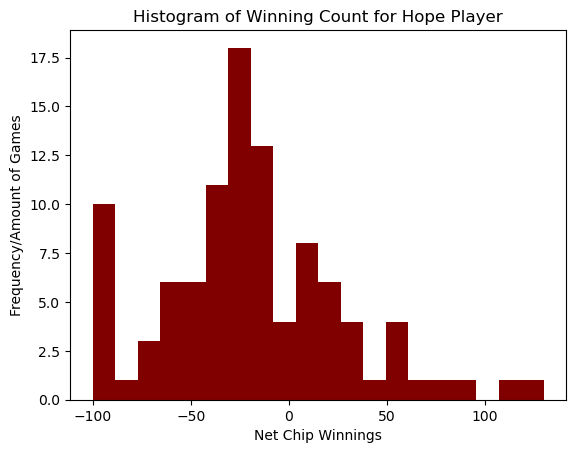

In [38]:
new_game=new_tester(n_game=100) #100 games of automatic 50 rounds/until strategy player runs out of chips

#for the stats 
hope_win= [d['Net Win']['Hope'] for d in new_game]

rounds_pl= [r['Rounds Played'] for r in new_game]
total_rounds_pl=sum(rounds_pl)

hope_av_w=np.mean(hope_win)/ total_rounds_pl #account for rounds actually played/game
hope_sta=np.std(hope_win)
net_win_p=sum(1 for chips in hope_win if chips > 0)/len(hope_win) #account for games played
net_lose_p=1-net_win_p

print("Average Net Winnings (Chips) per Round:", hope_av_w, 
      "\nStandard Dev:", hope_sta, "\nWin Probability:", net_win_p ,
      "\nLose Probability:", net_lose_p)

#histogram for hope player only
plt.hist(hope_win,bins=20,color='maroon')
plt.title("Histogram of Winning Count for Hope Player")
plt.xlabel("Net Chip Winnings")
plt.ylabel("Frequency/Amount of Games")

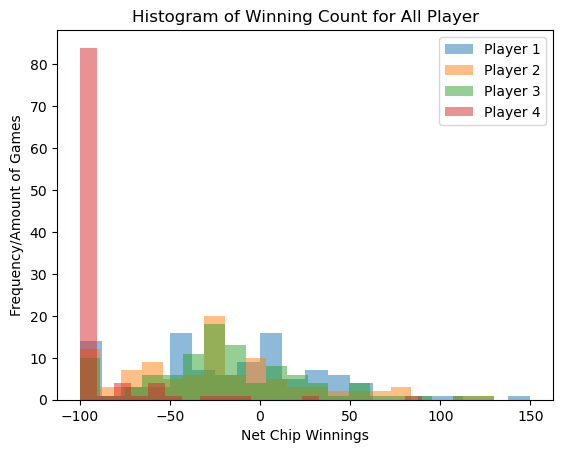

In [40]:
#histogram for all player
total_pl=4
all=np.zeros((len(new_game),total_pl)) #make empty array

for i, result in enumerate(new_game): #make array into shape (game, player - winnings)
    for j,player_name in enumerate(['Sim1','Sim2','Hope','Strategy']):
        all[i,j]= result['Net Win'][player_name] 
        
for i in range(all.shape[1]):
    plt.hist(all[:,i], label=f'Player {i+1}', alpha=0.5, bins=20)
plt.title("Histogram of Winning Count for All Player")
plt.xlabel("Net Chip Winnings")
plt.ylabel("Frequency/Amount of Games")
plt.legend()
plt.show()